In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import glob
import pickle
%matplotlib inline

# Camera Calibration

computed the camera matrix and distortion coefficients

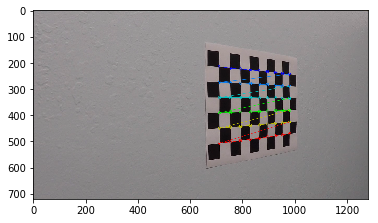

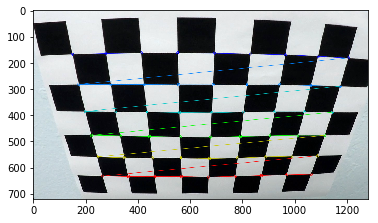

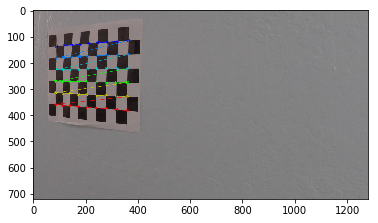

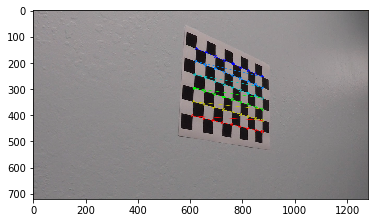

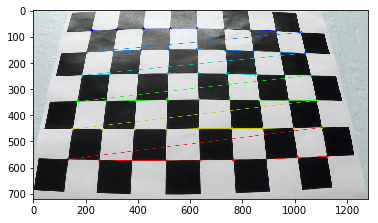

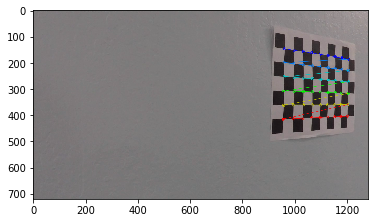

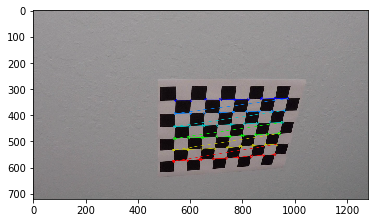

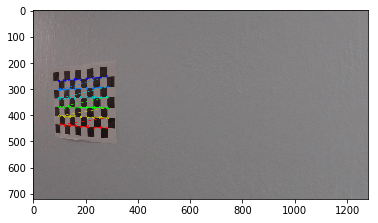

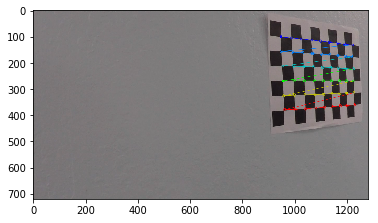

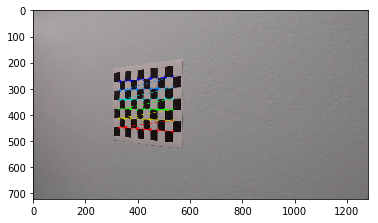

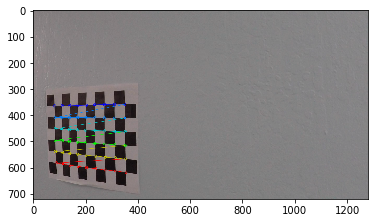

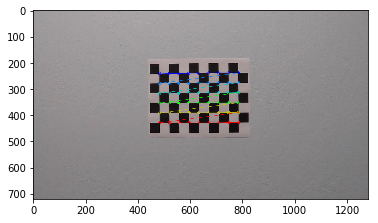

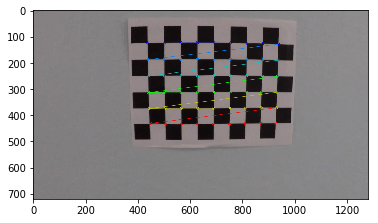

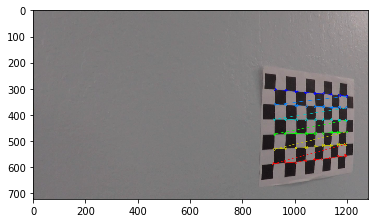

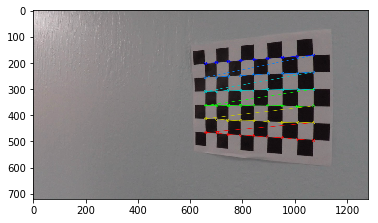

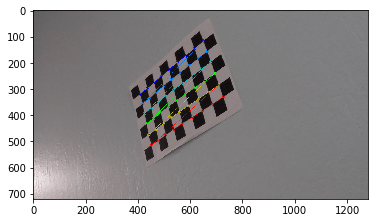

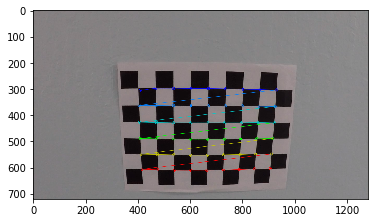

In [4]:
#Read in image
images=glob.glob('camera_cal/calibration*.jpg')

nx=9
ny=6
    
#Arrays to store object points and image points from all the images
objpoint=[]#3D ponits in real world space 
imgpoint=[]#2D points in image plane

#Prepare object points,like(0,0,0),(1,0,0).......
objp=np.zeros((ny*nx,3),np.float32)
objp[:,:2]=np.mgrid[0:nx,0:ny].T.reshape(-1,2)
    

#def find_corner(nx,ny):
      
for fname in images:
           
    img=cv2.imread(fname)
        
    #Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
    ret,corners=cv2.findChessboardCorners(gray,(nx,ny),None)
        
    if ret==True:
        imgpoint.append(corners)
        objpoint.append(objp)
            
        #draw and display the corners
        img=cv2.drawChessboardCorners(img,(nx,ny),corners,ret)
        plt.imshow(img)
        plt.show()

       
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoint, imgpoint, gray.shape[::-1], None, None)
    

In [5]:
 #Save mtx and dist as a pickle file
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "wide_dist_pickle.p", "wb" ) )

an example of a distortion corrected calibration image

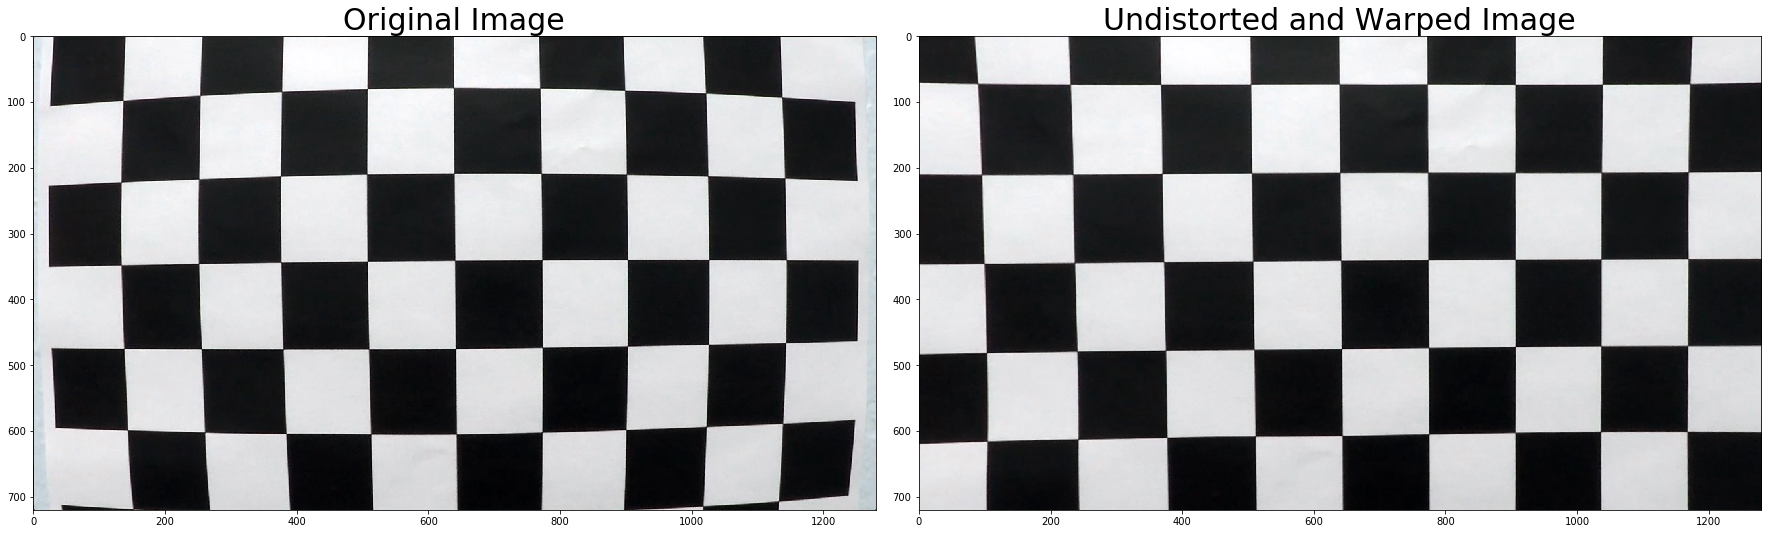

In [6]:
# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = cv2.imread('camera_cal/calibration1.jpg')

# Use the OpenCV undistort() function to remove distortion
undist = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undist)
ax2.set_title('Undistorted and Warped Image', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)



# Pipeline (test images)

Provide an example of a distortion-corrected image.

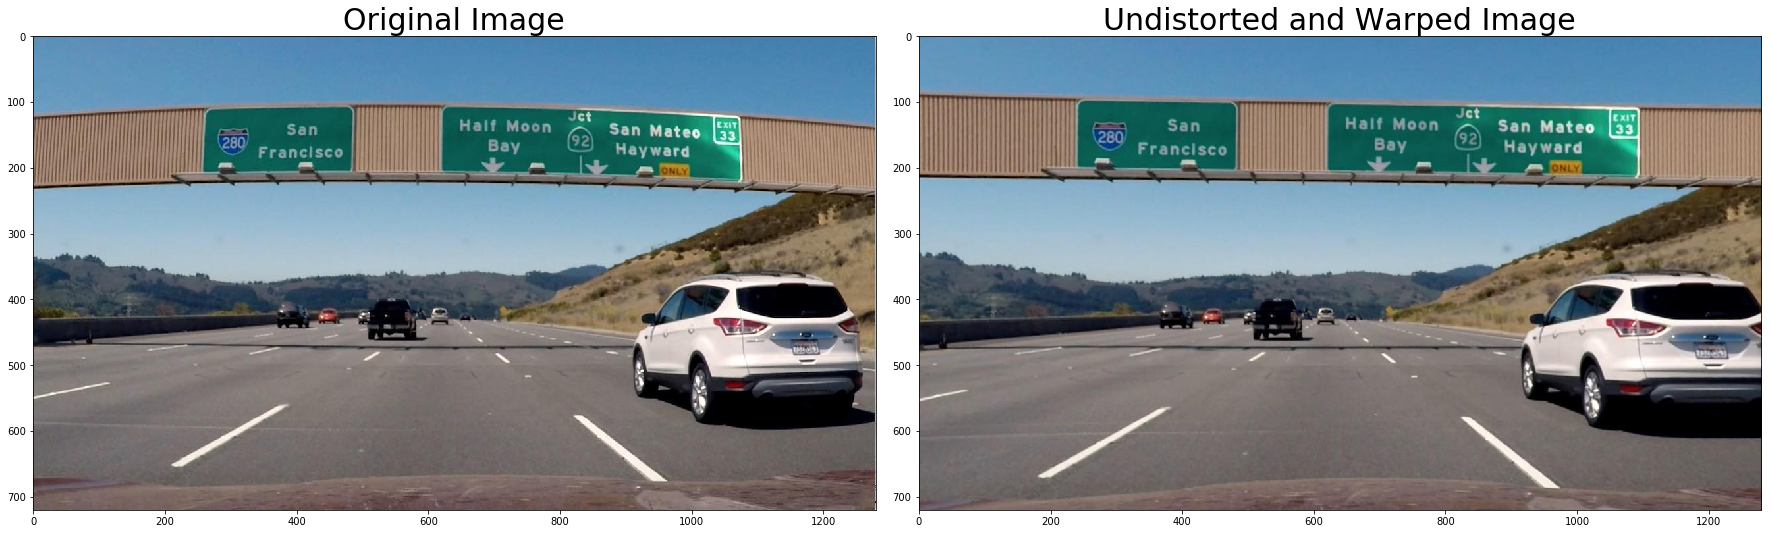

In [7]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import glob
import pickle
%matplotlib inline

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = mpimg.imread('test_images/signs_vehicles_xygrad.png')

# Use the OpenCV undistort() function to remove distortion
undist = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undist)
ax2.set_title('Undistorted and Warped Image', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Use color transforms, gradients, etc., to create a thresholded binary image.

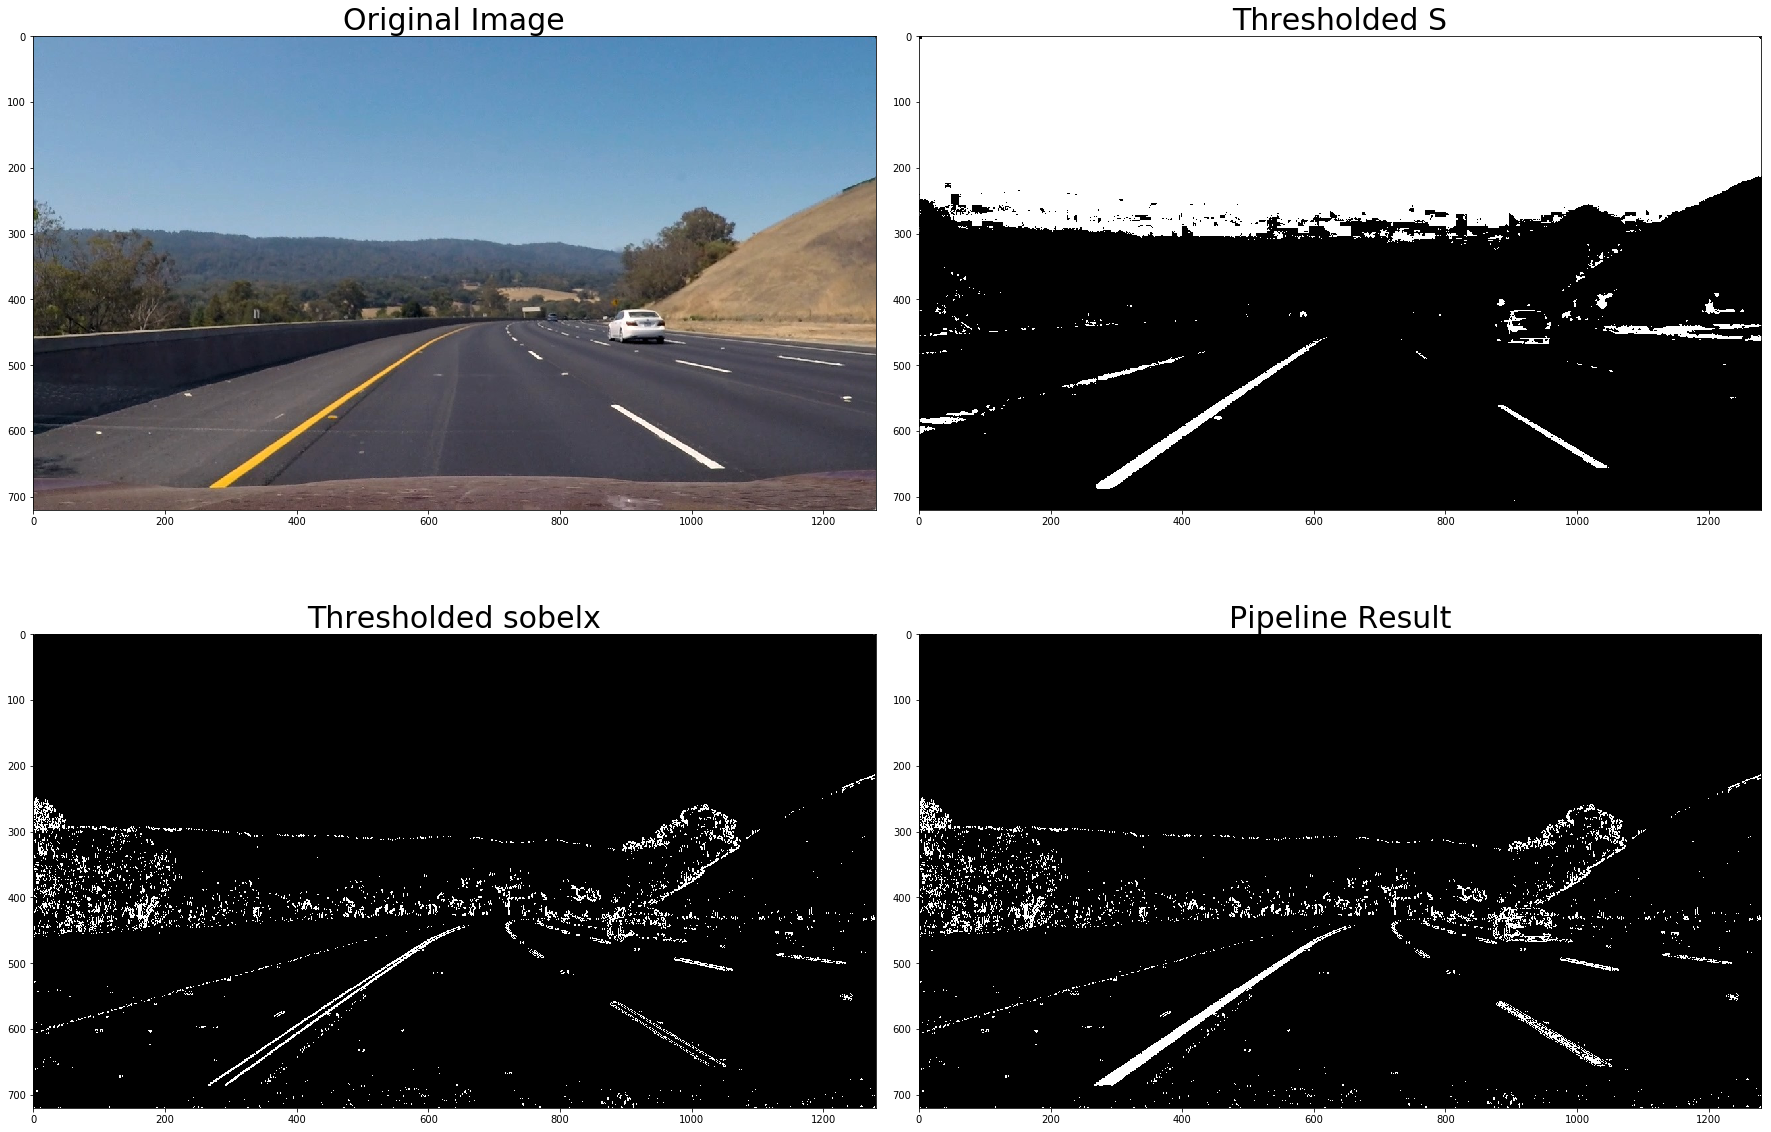

In [8]:
# Read in an image
image=mpimg.imread('test_images/test3.jpg')

def hls_select(img,thresh=(0,255)):
    hls=cv2.cvtColor(img,cv2.COLOR_RGB2HLS)
    s_channel=hls[:,:,2]
    binary_out_s=np.zeros_like(s_channel)
    binary_out_s[(s_channel>thresh[0])&(s_channel<=thresh[1])]=1
    return binary_out_s

def abs_sobel_thresh(img,orient='x',thresh_min=0,thresh_max=255):
    # Convert to grayscale
    gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x  gradient with the OpenCV Sobel() function
    # and take the absolute value
    abs_sobelx=np.absolute(cv2.Sobel(gray,cv2.CV_64F,1,0))
    
    scaled_sobel=np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    binary_out_sobelx=np.zeros_like(scaled_sobel)
    binary_out_sobelx[(scaled_sobel>=thresh_min)&(scaled_sobel<=thresh_max)]=1
    
    return binary_out_sobelx

def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    # Convert to grayscale
    gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Sobel x
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    # Combine the two binary thresholds
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
    
    
    return combined_binary
    

hls_binary=hls_select(image,thresh=(90,255))
sobelx_binary=abs_sobel_thresh(image,orient='x',thresh_min=20,thresh_max=100)
result = pipeline(image)

f, ax = plt.subplots(2, 2, figsize=(24, 18))
f.tight_layout()
ax[0,0].imshow(image)
ax[0,0].set_title('Original Image', fontsize=30)
ax[0,1].imshow(hls_binary,cmap='gray')
ax[0,1].set_title('Thresholded S', fontsize=30)
ax[1,0].imshow(sobelx_binary,cmap='gray')
ax[1,0].set_title('Thresholded sobelx', fontsize=30)
ax[1,1].imshow(result,cmap='gray')
ax[1,1].set_title('Pipeline Result', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

 Apply a perspective transform to rectify binary image ("birds-eye view").

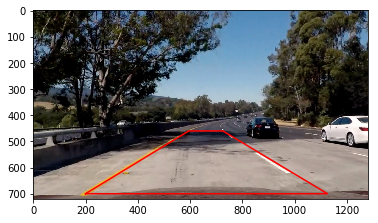

In [9]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import glob
import pickle
%matplotlib inline

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img=mpimg.imread('test_images/test5.jpg')

# Use the OpenCV undistort() function to remove distortion
image = cv2.undistort(img, mtx, dist, None, mtx)

#Hard coded number for the images

src1=[200,700]
src2=[1125,700]
src3=[725,460]
src4=[595,460]

plt.imshow(image)
x = [src1[0], src2[0], src3[0], src4[0],src1[0]]
y = [src1[1], src2[1], src3[1], src4[1],src1[1]]
plt.plot(x, y, 'r-', lw=1.5)


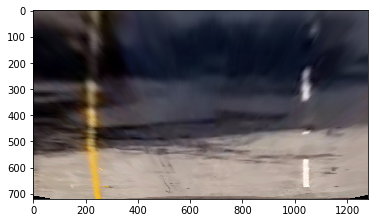

In [10]:


# Function to get the M and M inverse matrix for perspective transform
def PerspectiveTransform(img):
    src=np.float32([(200,700),(1125,700),(725,460),(595,460)])
    dst=np.float32([(250,720),(1065,720),(1065,0),(250,0)])
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    # Warp onto birds-eye-view
    # Previous region-of-interest mask's function is absorbed by the warp
    warped = cv2.warpPerspective(img, M, (image.shape[1], image.shape[0]), flags=cv2.INTER_LINEAR)
    return M, Minv,warped

# Get the transform matrices 
M, Minv,warped = PerspectiveTransform(image)


plt.imshow(warped, cmap="gray")

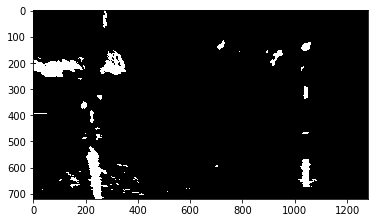

In [11]:
def pipeline_new(img, s_thresh=(170, 255), sx_thresh=(30, 255), sy_thresh=(50, 100)):
    
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    
    
    r_thresh=[200, 255]
    g_thresh=[200, 255]
    b_thresh=[200, 255]
    r_channel = img[:,:,0]
    g_channel = img[:,:,1]
    b_channel = img[:,:,2]
    # Convert to grayscale
    gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Sobel x
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobelx = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobelx)
    sxbinary[(scaled_sobelx >= sx_thresh[0]) & (scaled_sobelx <= sx_thresh[1])] = 1
    
      # Sobel y
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1) # Take the derivative in x
    abs_sobely = np.absolute(sobely) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobely = np.uint8(255*abs_sobely/np.max(abs_sobely))  
    
    # Threshold x gradient
    sybinary = np.zeros_like(scaled_sobely)
    sybinary[(scaled_sobely >= sy_thresh[0]) & (scaled_sobely <= sy_thresh[1])] = 1
    
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    r_binary = np.zeros_like(r_channel)
    r_binary[(r_channel >= r_thresh[0]) & (r_channel <= r_thresh[1])] = 1
   
    
    g_binary = np.zeros_like(g_channel)
    g_binary[(g_channel >= g_thresh[0]) & (g_channel <= g_thresh[1])] = 1
  
    
    
    b_binary = np.zeros_like(b_channel)
    b_binary[(b_channel >= b_thresh[0]) & (b_channel <= b_thresh[1])] = 1
  
    
    # Combine the two binary thresholds
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | ((sxbinary == 1)&(sybinary == 1))|(r_binary == 1)|(g_binary == 1)|(b_binary == 1)] = 1
    
    
    return combined_binary

result = pipeline_new(warped)
plt.imshow(result, cmap="gray")

Detect lane pixels and fit to find the lane boundary.

Determine the curvature of the lane and vehicle position with respect to center.

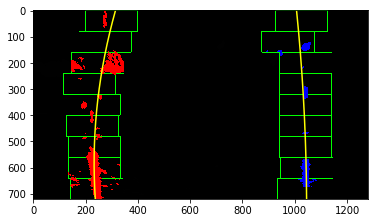

In [12]:
def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        # Identify the nonzero pixels in x and y within the window #
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img


def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)

    
    right_fit = np.polyfit(righty, rightx, 2)
    

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
 
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')

    return out_img,(left_fit,right_fit),(left_fitx,right_fitx)


out_img,fit_lanes,fitx_lanes = fit_polynomial(result)

plt.imshow(out_img)

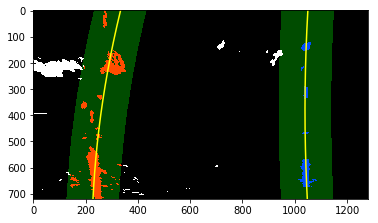

In [13]:
left_fit = np.array([ 8.78196097e-05,  -2.04686401e-01,   3.35237753e+02])
right_fit = np.array([1.93159673e-04,  -2.12907077e-01,   1.09898473e+03])

def fit_poly(img_shape, leftx, lefty, rightx, righty):
     ### TO-DO: Fit a second order polynomial to each with np.polyfit() ###
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, img_shape[0]-1, img_shape[0])
    ### TO-DO: Calc both polynomials using ploty, left_fit and right_fit ###
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    return left_fitx, right_fitx, ploty

def search_around_poly(binary_warped):
    # HYPERPARAMETER
    # Choose the width of the margin around the previous polynomial to search
    # The quiz grader expects 100 here, but feel free to tune on your own!
    margin = 100

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])

    ### TO-DO: Set the area of search based on activated x-values ###
    ### within the +/- margin of our polynomial function ###
    ### Hint: consider the window areas for the similarly named variables ###
    ### in the previous quiz, but change the windows to our new search area ###
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
                    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
                    left_fit[1]*nonzeroy + left_fit[2] + margin)))
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
                    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
                    right_fit[1]*nonzeroy + right_fit[2] + margin)))
    
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit new polynomials
    left_fitx, right_fitx, ploty = fit_poly(binary_warped.shape, leftx, lefty, rightx, righty)
    
    ## Visualization ##
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    # Plot the polynomial lines onto the image
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    ## End visualization steps ##
    
    return result

# Run image through the pipeline
# Note that in your project, you'll also want to feed in the previous fits
result1 = search_around_poly(result)


# View your output
plt.imshow(result1)
   
    
 

In [190]:
def calc_curvature(leftx,rightx):
    ym_per_pix = 25/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/800 # meters per pixel in x dimension

    ploty = np.linspace(0, 719, num=720)
    y_eval = np.max(ploty)
    
    left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
    
    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval =719

    # Calculation of R_curve (radius of curvature)
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])

    #curvature=(left_curverad+right_curverad)/2
    #min_curvature=min(left_curverad,right_curverad)

    #left_centre=left_fit[0]*y_eval**2 + left_fit[1]*y_eval +left_fit[2]
    #right_centre=right_fit[0]*y_eval**2 + right_fit[1]*y_eval +right_fit[2]
    #centre =1.5*(left_centre-right_centre)/2
    return left_curverad,right_curverad

    
    # Should see values of 533.75 and 648.16 here, if using
    # the default `generate_data` function with given seed number

left_curverad,right_curverad=calc_curvature(fitx_lanes[0],fitx_lanes[1])
print(left_curverad)
print(right_curverad)

543.825147736
1978.1150599


In [191]:
def calc_offset(img, leftx, rightx):
    #Define conversions in x from pixels space to meters
    xm_per_pix = 3.7/800 # meters per pixel in x dimension
    
    midpoint = img.shape[1]//2
    cur_position = (leftx[-1] + rightx[-1])/2
    
    #return offset in meters
    return (midpoint - cur_position) * xm_per_pix

offset = calc_offset(img, fitx_lanes[0], fitx_lanes[1])
print(offset, 'm')

-0.00571595590371 m


 Warp the detected lane boundaries back onto the original image.

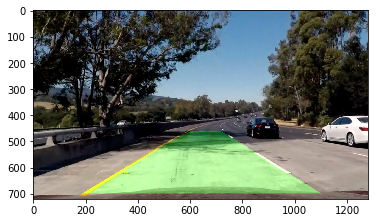

In [192]:
def unwarp(image, warped_binary, left_points, right_points, Minv):
    
    ploty = np.linspace(0, 719, num=720)
    y_eval = np.max(ploty)
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(warped_binary).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    left_fitx = left_points
    right_fitx = right_points
    ploty = ploty

    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (img.shape[1], img.shape[0])) 

    # Combine the result with the original image
    return cv2.addWeighted(image, 1, newwarp, 0.3, 0), color_warp 


img_lane,color_warp=unwarp(image,result,fitx_lanes[0],fitx_lanes[1],Minv)
plt.imshow(img_lane)


Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

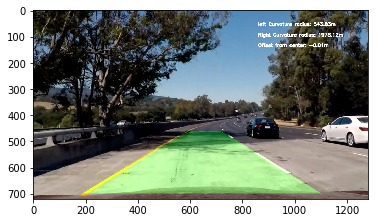

In [193]:
def annotate_video(color_unwarped, left_fit, right_fit, offsets, lcurvatures, rcurvatures):
    h, w = color_unwarped.shape[:2]
    
    thumb_ratio = 0.2
    thumb_h, thumb_w = int(thumb_ratio * h), int(thumb_ratio * w)

    off_x, off_y = 20, 15
    
#     # add binary image to original image
#     thumb_binary = cv2.resize(binary_image, dsize=(thumb_w, thumb_h))
#     thumb_binary = np.dstack([thumb_binary, thumb_binary, thumb_binary]) * 255
#     color_unwarped[off_y:thumb_h+off_y, off_x:off_x+thumb_w, :] = thumb_binary

#     # add bird eye view to original image
#     thumb_birdeye = cv2.resize(birdeye_image, dsize=(thumb_w, thumb_h))
#     thumb_birdeye = np.dstack([thumb_birdeye, thumb_birdeye, thumb_birdeye]) * 255
#     color_unwarped[off_y:thumb_h+off_y, 2*off_x+thumb_w:2*(off_x+thumb_w), :] = thumb_birdeye

#     # add bird eye view + lane highlighted to original image
#     thumb_img_fit = cv2.resize(color_warp, dsize=(thumb_w, thumb_h))
#     color_unwarped[off_y:thumb_h+off_y, 3*off_x+2*thumb_w:3*(off_x+thumb_w), :] = thumb_img_fit
    
    #calculate and add curvature/offset to image

    
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(color_unwarped, 'left Curvature radius: {:.02f}m'.format(lcurvatures), (860, 60), font, 0.6, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(color_unwarped, 'Right Curvature radius: {:.02f}m'.format(rcurvatures), (860, 100), font, 0.6, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(color_unwarped, 'Offset from center: {:.02f}m'.format(offsets), (860, 140), font, 0.6, (255, 255, 255), 2, cv2.LINE_AA)

    return color_unwarped

final_output = annotate_video(img_lane,fit_lanes[0],fit_lanes[1],offset, left_curverad,right_curverad)
plt.imshow(final_output)

In [194]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import glob
import pickle
%matplotlib inline 

In [195]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [15]:
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

src=np.float32([(280,700),(1125,700),(725,460),(595,460)])
dst=np.float32([(250,720),(1065,720),(1065,0),(250,0)])

def video_pipline(frame1):
    
    #find lanes
    undistorted1 = cv2.undistort(frame1, mtx, dist, None, mtx)
    thresh_binary1 = pipeline_new(undistorted1)
    M , Minv,warped_binary1 = PerspectiveTransform(thresh_binary1)
    #detected_lane, fit_lane, fitx_lane, ploty  = find_lanes(warped_binary)
    detected_lane1, fit_lane, fitx_lane = fit_polynomial(warped_binary1)
    
    color_unwarped1, color_warp = unwarp(frame1, warped_binary1, fitx_lane[0], fitx_lane[1],  Minv)
    
    #get Off_set and Curvature
    offset = calc_offset(frame1, fitx_lane[0], fitx_lane[1])
    left_curverad,right_curverad=calc_curvature(fitx_lane[0],fitx_lane[1])
        
    #add information to the video
    final_output = annotate_video(color_unwarped1,fit_lanes[0],fit_lanes[1],offset, left_curverad,right_curverad)
    return final_output

In [16]:
output = 'project_output_video.mp4'
clip1 = VideoFileClip("project_video.mp4")
output_clip = clip1.fl_image(video_pipline) #NOTE: this function expects color images!!
%time output_clip.write_videofile(output, audio=False)

NameError: name 'VideoFileClip' is not defined

In [14]:
HTML("""
<video width="640" height="360" controls>
  <source src="{0}">
</video>
""".format(output))

NameError: name 'HTML' is not defined

In [ ]:
#Save video as images
#Opens the Video file
cap= cv2.VideoCapture('project_video.mp4')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('./video_images/frame'+str(i)+'.jpg',frame)
    i+=1
 
cap.release()
cv2.destroyAllWindows()